# Lending Club Case Study


In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv("loan.csv")

C:\Users\simra\AppData\Local\Temp\ipykernel_18500\3592418794.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


# Data Understanding

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [8]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
# we can see that many columns have 100% missing values, and other 65%, 33% etc. 
# let's get clean the columns having 100% missing values.

In [11]:
null_col = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(null_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
# now we are dropping those columns having 100% missing value

loan = loan.drop(null_col, axis=1)

In [13]:
# checking the null values again 
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
# checking the shape of dataframe again after dropping columns 
loan.shape

(39717, 55)

In [15]:
# now handle columns with missing value
# There are now 2 columns having approx 32% and 64% missing values

loan.loc[:, ['desc', 'mths_since_last_delinq']].head()



,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [16]:
# As these columns are not that much informative for our analysis so, we can drop these two columns as they are having great % of
# missing values.

In [17]:
# let's drop these two columns 

loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [18]:
# checking number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [19]:
# Now we can see that there are less number of columns having missing values and there percentage is pretty much low

In [20]:
# we can check the num of missing values row wise as well 
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [21]:
# we can see that all the rows having missing value is less than 5 
# so we can easily drop them or fill them with required function.

In [22]:
loan['emp_title'].isnull().sum()

2459

In [23]:
loan['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [24]:
# As we can see the mode for 'emp_title' is US Army but we can not fill the NaN values with that so, 
# we are going to drop those rows

In [25]:
loan = loan.dropna(subset=['emp_title'])
 

In [26]:
loan['emp_title'].isnull().sum()

0

In [27]:
loan['emp_length'].value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

In [28]:
# we can fill the NaN values of emp_length with 10+ years as it is the mode of it

In [29]:
loan.fillna({'emp_length':'10+ years'},inplace = True)

In [30]:
loan['emp_length'].isnull().sum()

0

In [31]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    35090
1.0     1507
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
loan.fillna({'pub_rec_bankruptcies':0.0},inplace = True)

In [33]:
loan['pub_rec_bankruptcies'].isnull().sum()

0

In [34]:
# so we have filled the rows with NaN values and rest of the rows with NaN VALUES we can drop them as those are very less in 
# number i.e. less thann 1% 

In [35]:
loan.dropna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39661,121530,121527,3000,3000,2225.0,36 months,7.75%,93.67,A,A3,...,2563.55,Aug-07,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39662,121426,121423,3000,3000,2975.0,36 months,7.75%,93.67,A,A3,...,2563.59,Aug-07,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39663,120525,120227,4000,4000,1475.0,36 months,10.91%,130.79,C,C3,...,134.78,Jun-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39664,120374,119635,2000,2000,475.0,36 months,8.70%,63.32,B,B1,...,64.27,Aug-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [36]:
# reset the index after dropping the rows
loan= loan.reset_index(drop = True)

In [37]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [38]:
# Removing the columns url, zip_code as they are not that much important for analysis
loan.drop(columns = ['url','zip_code','title','addr_state'], axis = 1, inplace=True)

In [39]:
loan.shape

(37258, 49)

In [40]:
# converting the int_rate to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.rstrip('%')))

In [41]:
# now it is easy to do operation on int_rate

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [42]:
# get numeric part only of emp_length

loan['emp_length'] = loan['emp_length'].apply(lambda x: x.rstrip('years'))

In [43]:
loan['emp_length']

0        < 1 
1        10+ 
2          1 
3          3 
4          8 
         ... 
37253      1 
37254      5 
37255      4 
37256      3 
37257    < 1 
Name: emp_length, Length: 37258, dtype: object

In [44]:
# now take a look to all the columns of dataframe
print(*loan.columns,sep='\n')

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


# Data Analysis

#### Firstly, identify the Consumer and Loan attributes for analysis:

#### Consumer Attributes:

- age
- occupation
- annual_income
- emp_length
- addr_state

### Loan Attributes:

- loan_amnt
- funded_amnt
- funded_amnt_inv
- term
- int_rate
- installment
- grade
- sub_grade
- verification_status
- issue_d
- loan_status
- purpose

####  secondly , Ignoring the below columns for analysis as they depend on customer behavoiour after approving the loan :
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries and so on ....

#### Removing the unneeded columns

In [45]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [46]:
loan.drop(columns =list(loan.columns[21:]), inplace=True)

In [47]:
loan.shape

(37258, 21)

In [48]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,11.20,0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,23.51,0


In [49]:
loan['loan_status'].value_counts()

Fully Paid     31048
Charged Off     5143
Current         1067
Name: loan_status, dtype: int64

In [50]:
# Check the max value of loan amount
loan.loan_amnt.max()

35000

In [51]:
loan= loan[loan['loan_status'] != 'Current']


Coversion of loan Status to Numerical values 0 (Fully Paid) and 1(Charged Off)¶

In [52]:
# Applying function to loan status to change the values to numerical
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x == 'Fully Paid'else 1)

In [53]:
loan['loan_status'].value_counts()

0    31048
1     5143
Name: loan_status, dtype: int64

# Univariate Analysis

### 1. Interest Rate

In [54]:
loan['int_rate'].describe()

count    36191.000000
mean        11.967160
std          3.684261
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

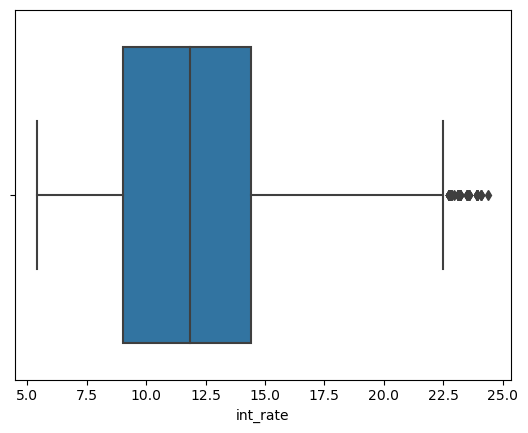

In [55]:
sns.boxplot(loan['int_rate'])

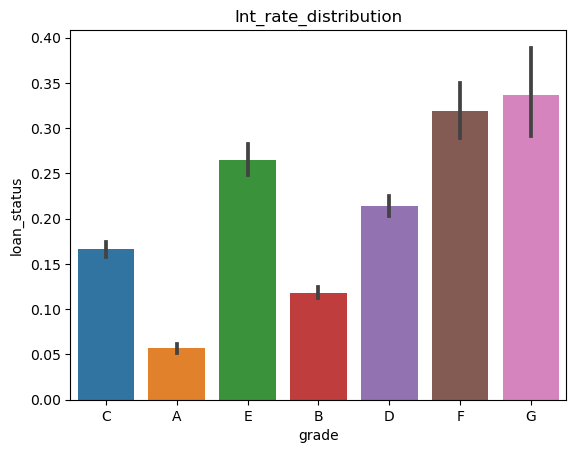

In [56]:
# now we'll go with the bar plot

sns.barplot(x='grade', y='loan_status', data=loan)
plt.title("Int_rate_distribution")
plt.show()

### We can see that as grade of loan goes from A to G, the default rate increases. 

In [57]:
print(loan['int_rate'].quantile(0.25),loan['int_rate'].quantile(0.75))

9.01 14.42


### Majority of the interest distribution is in 9 - 14.42%

In [58]:
# defininig a function to plot
def plot_bar(var):
    sns.barplot(x=var, y='loan_status', data=loan,orient='v')
    plt.show()
    

### 2. Term

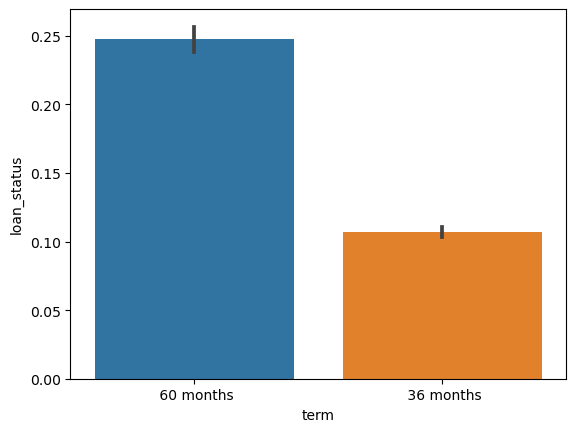

In [59]:
plot_bar('term')

### We can see that 60 months loans preferred more than 36 months loans

### 3.Loan amount

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

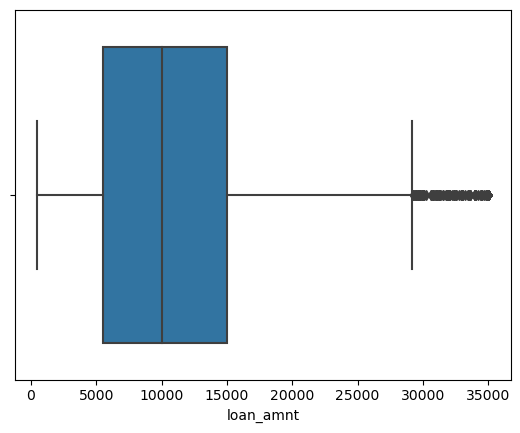

In [60]:
sns.boxplot(loan['loan_amnt'])

### Most of loan amount is distributed between 5000 - 15000

### 4. Emp length

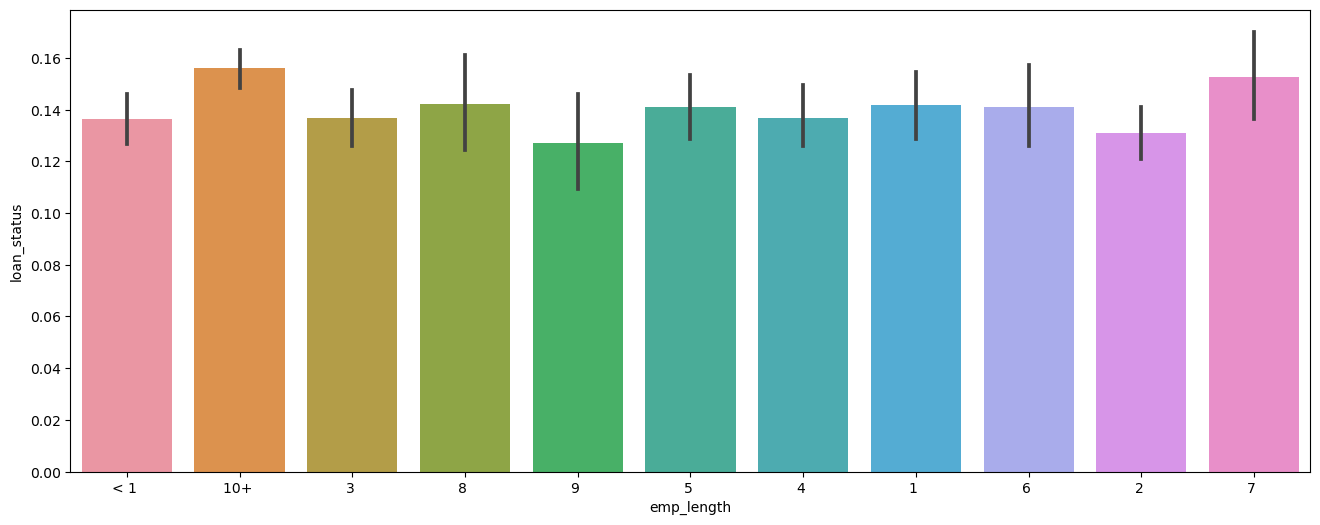

In [61]:
plt.figure(figsize=(16, 6))
plot_bar('emp_length')

### 10+ loans defualt the most, then others

### 5. Purpose

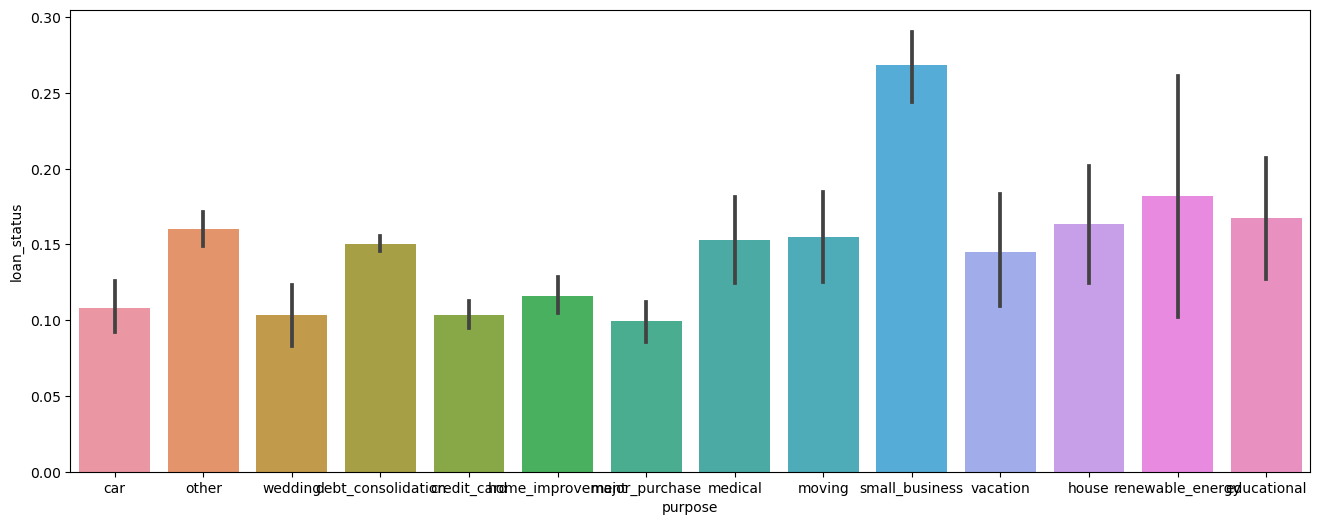

In [62]:
plt.figure(figsize=(16, 6))
plot_bar('purpose')

### small business loans defualt the most, then renewable energy and educational

### 6. Home Ownership

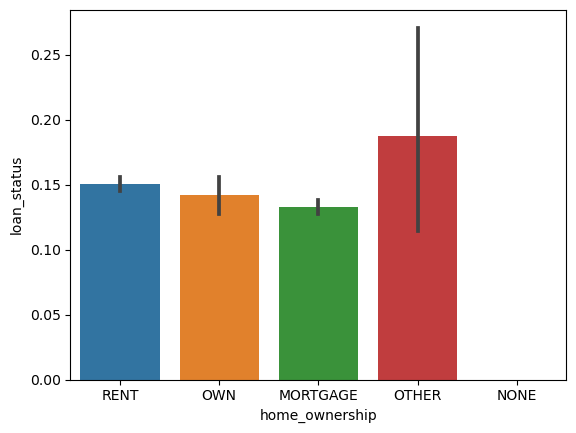

In [63]:
plot_bar('home_ownership')

### Majority of people borrowing the loan have home Ownership and Rent then other.

### 7. Verification status

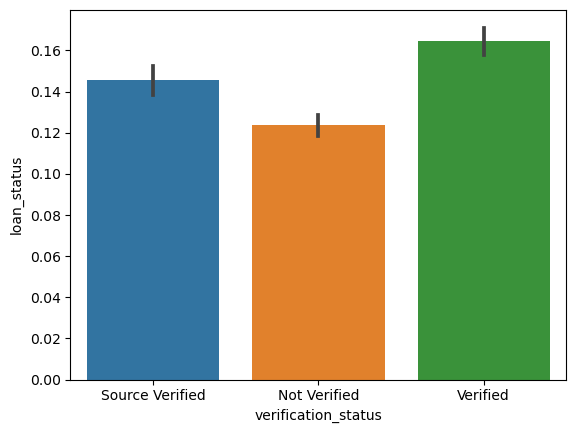

In [64]:
plot_bar('verification_status')

### verified loans defaults more than not verified

In [65]:
loan.issue_d.value_counts().head()

Dec-11    1919
Nov-11    1916
Oct-11    1798
Sep-11    1789
Aug-11    1695
Name: issue_d, dtype: int64

In [66]:
# Creating column for the issue_date using the 'strptime' datetime method

from datetime import datetime
loan['issued_year'] = loan.issue_d.apply(lambda x: datetime.strptime(x, '%b-%y').year)

In [67]:
loan.issued_year.value_counts()

2011    19160
2010    10862
2009     4449
2008     1493
2007      227
Name: issued_year, dtype: int64

In [68]:
groupby = loan.groupby('issued_year')['loan_amnt'].count()

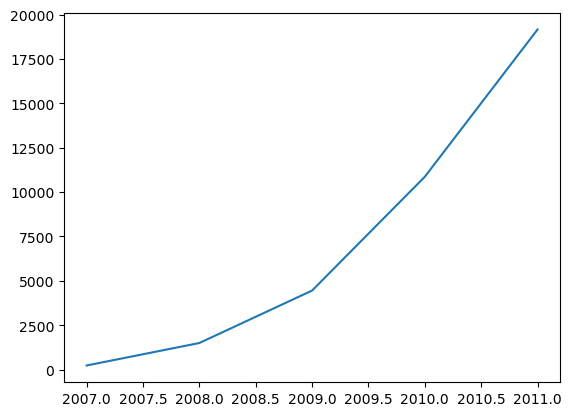

In [69]:
groupbyf = pd.DataFrame(groupby)
plt.plot(groupbyf)

### 8. Issued year

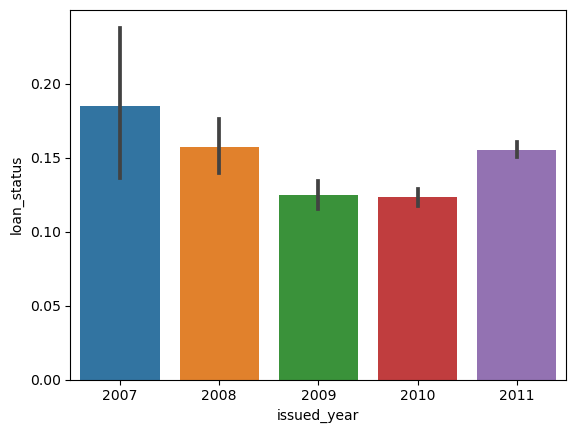

In [70]:
plot_bar('issued_year')

### The default rate increased in 2011

### 9. Loan status

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

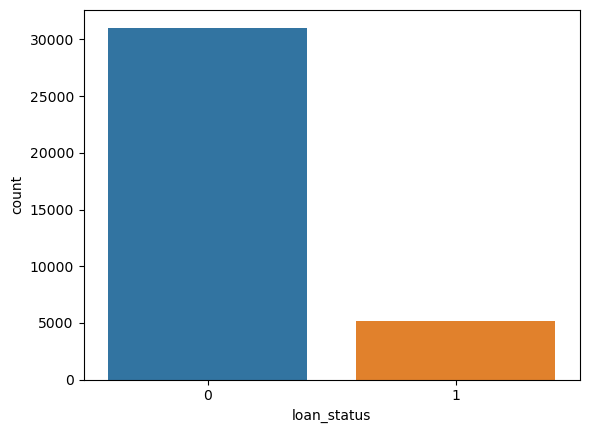

In [71]:
sns.countplot('loan_status',data = loan)

#### About 14% of the borrowers are charged Off out of total applicants

### 10. Annual income

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

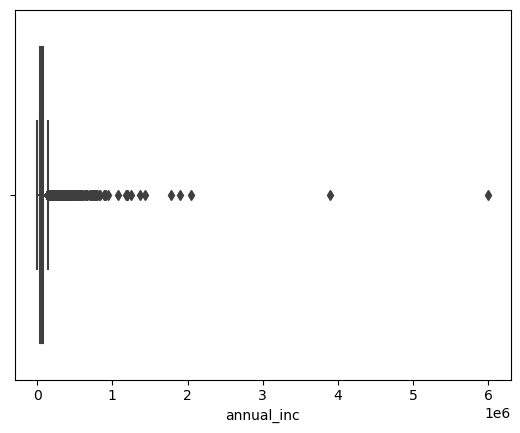

In [72]:
sns.boxplot(loan['annual_inc'])

In [73]:
print(loan.annual_inc.quantile(0.25),loan.annual_inc.quantile(0.75),sep = '\n')

41000.0
82000.0


#### Majority of the borrowers earnings is in the 41000 - 82000 range

### 11. loan amount

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


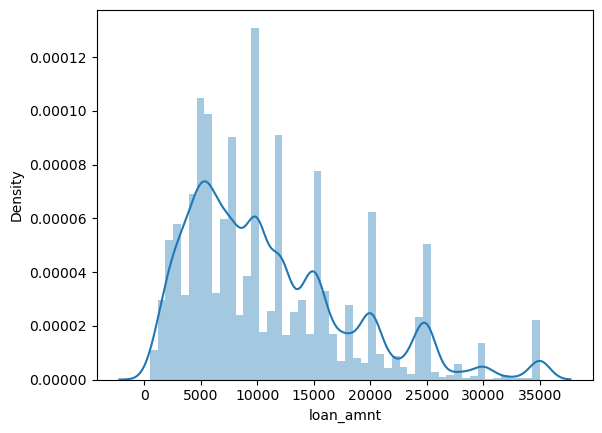

In [74]:
sns.distplot(loan['loan_amnt'])
plt.show()

###  The median loan amount is around 10,000

Let's bin the loan amount variable into small, medium, high, very high.

In [75]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))


In [76]:
loan['loan_amnt'].value_counts()

medium       19488
high          7298
low           6827
very high     2578
Name: loan_amnt, dtype: int64

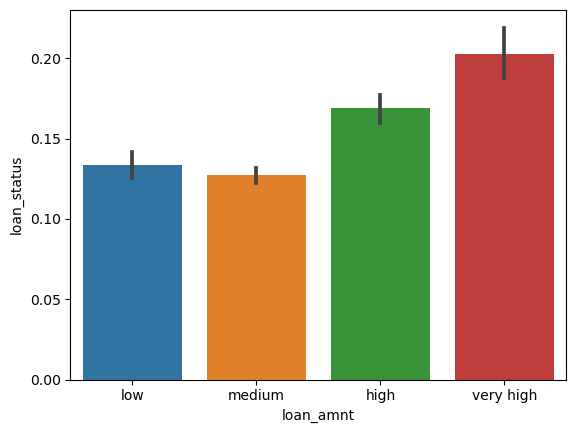

In [77]:
plot_bar('loan_amnt')

### we can see that higher the loan amount, higher the default rate

### 12. checking the purpose of most applied loan

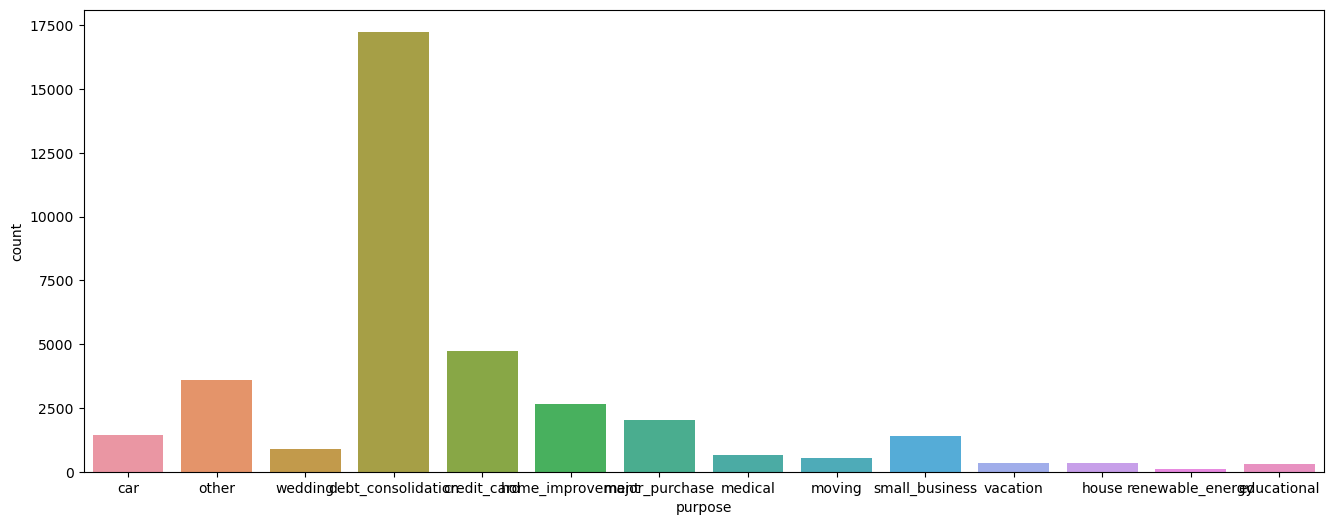

In [78]:
countplt, ax = plt.subplots(figsize = (16,6))
ax = sns.countplot(x = 'purpose',data = loan)


#### Majority of the loans are applied for debt_consolidation

In [79]:
loan.purpose.value_counts().head(5)

debt_consolidation    17251
credit_card            4727
other                  3593
home_improvement       2667
major_purchase         2004
Name: purpose, dtype: int64

### These are the top 5 purpose

### 13. Installment

In [80]:
# installment dividing into bins into Low, Medium, High and very High
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

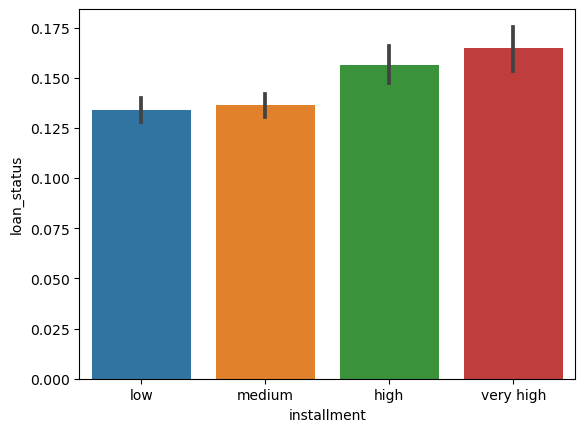

In [81]:
plot_bar('installment')

### higher the installment , higher the default rate

### 14. Int rate

In [82]:
# converting interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

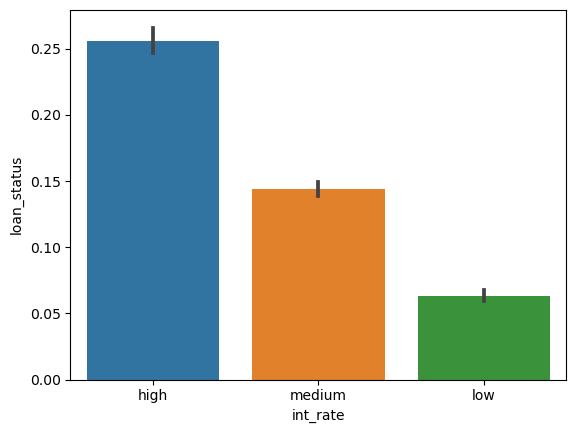

In [83]:
plot_bar('int_rate')

### high interest rates default more

### 14. sub grade

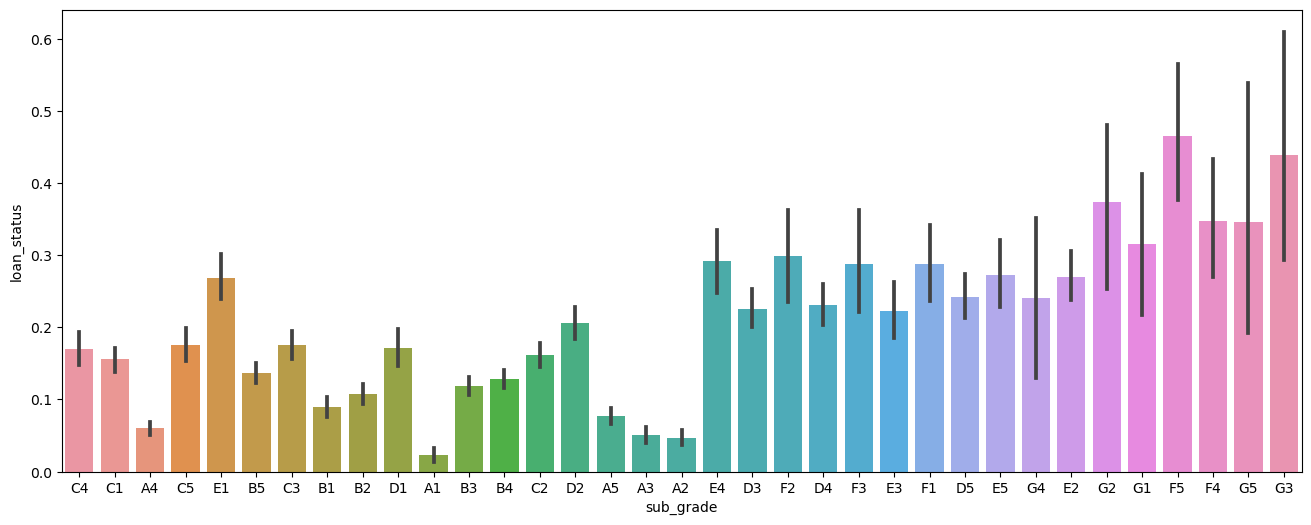

In [84]:
plt.figure(figsize=(16, 6))
plot_bar('sub_grade')

### A1 is better than A2 and A2 is better than A3 and so on 

### 15. Dti 

In [85]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

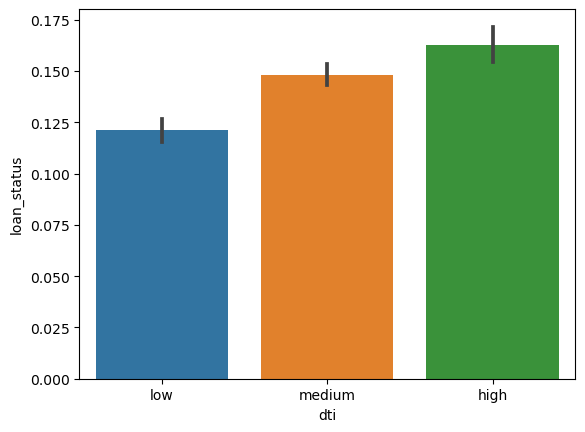

In [86]:
plot_bar('dti')

### higher the dti higher the default

# univariate segmentation

we will segment the loan across the purpose of the loan, since that is a variable affecting many other variables - interest rate, income, and so on 

### purpose

In [87]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17251
credit_card            4727
home_improvement       2667
major_purchase         2004
Name: purpose, dtype: int64

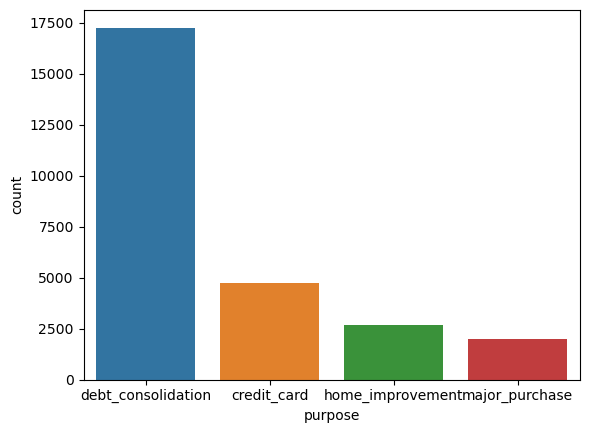

In [88]:
sns.countplot(x=loan['purpose'])
plt.show()

### loan status

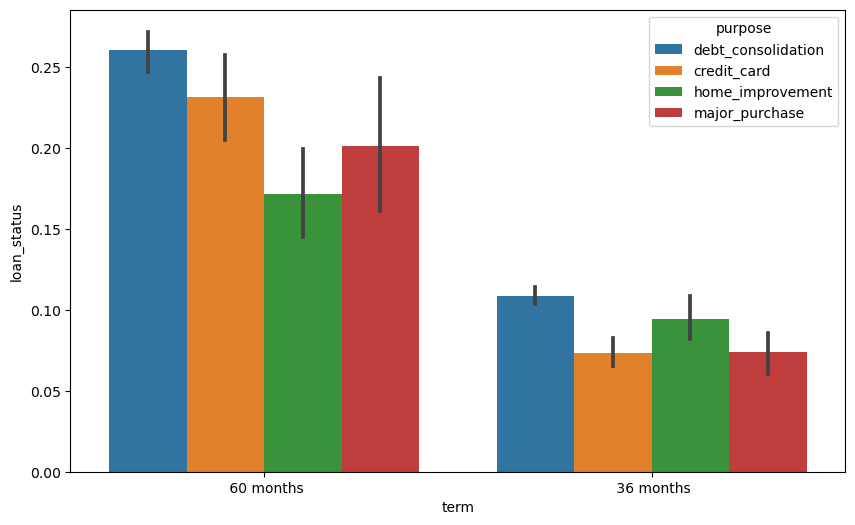

In [89]:
# let's now compare the default rates with the pupose 

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

### loan amnt

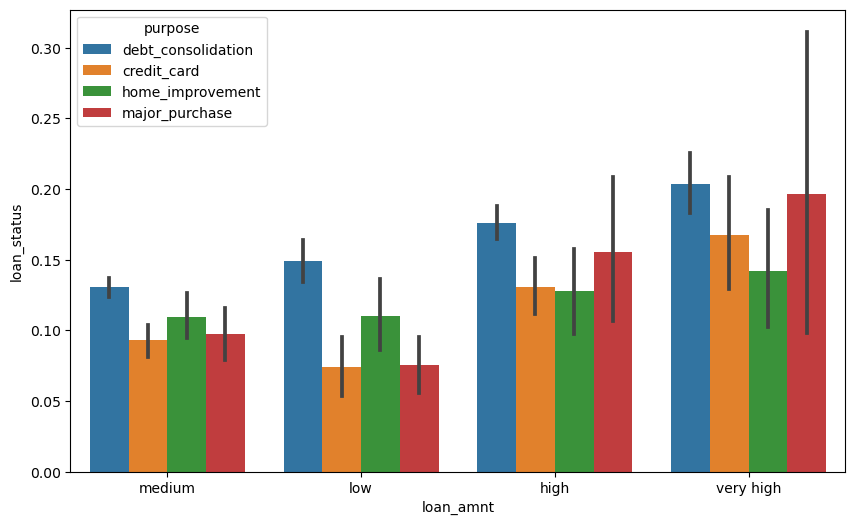

In [90]:
# segmented by purpose 

def plot_segmented(plot_bar):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=plot_bar, y='loan_status', hue='purpose', data=loan)
    plt.show()

    
plot_segmented('loan_amnt')

### grade of loan

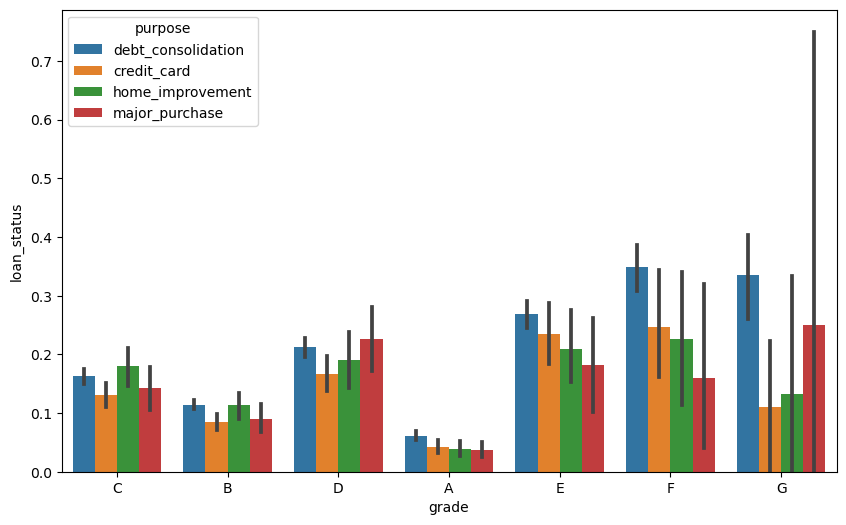

In [91]:
plot_segmented('grade')

### interest rate

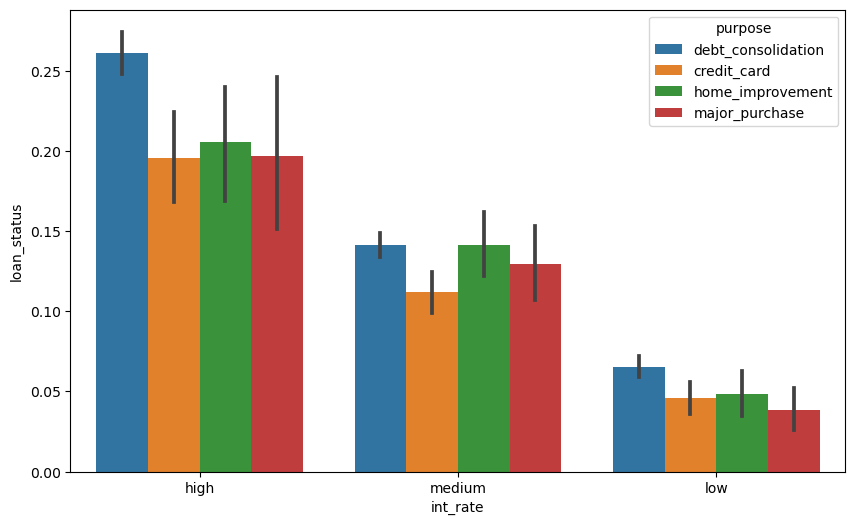

In [92]:
plot_segmented('int_rate')

# Bivariate Analysis

In [93]:
# Applying the correlation

loan.corr()


,id,member_id,funded_amnt,funded_amnt_inv,annual_inc,loan_status,delinq_2yrs,issued_year
id,1.000000,0.993626,0.139950,0.237779,0.000596,0.044820,-0.018952,0.839871
member_id,0.993626,1.000000,0.139792,0.248540,0.002327,0.042154,-0.018915,0.876747
funded_amnt,0.139950,0.139792,1.000000,0.957606,0.231496,0.065037,-0.032441,0.132146
funded_amnt_inv,0.237779,0.248540,0.957606,1.000000,0.220766,0.046096,-0.040337,0.262502
annual_inc,0.000596,0.002327,0.231496,0.220766,1.000000,-0.037136,0.024219,0.008968
loan_status,0.044820,0.042154,0.065037,0.046096,-0.037136,1.000000,0.008441,0.026368
delinq_2yrs,-0.018952,-0.018915,-0.032441,-0.040337,0.024219,0.008441,1.000000,-0.013296
issued_year,0.839871,0.876747,0.132146,0.262502,0.008968,0.026368,-0.013296,1.000000


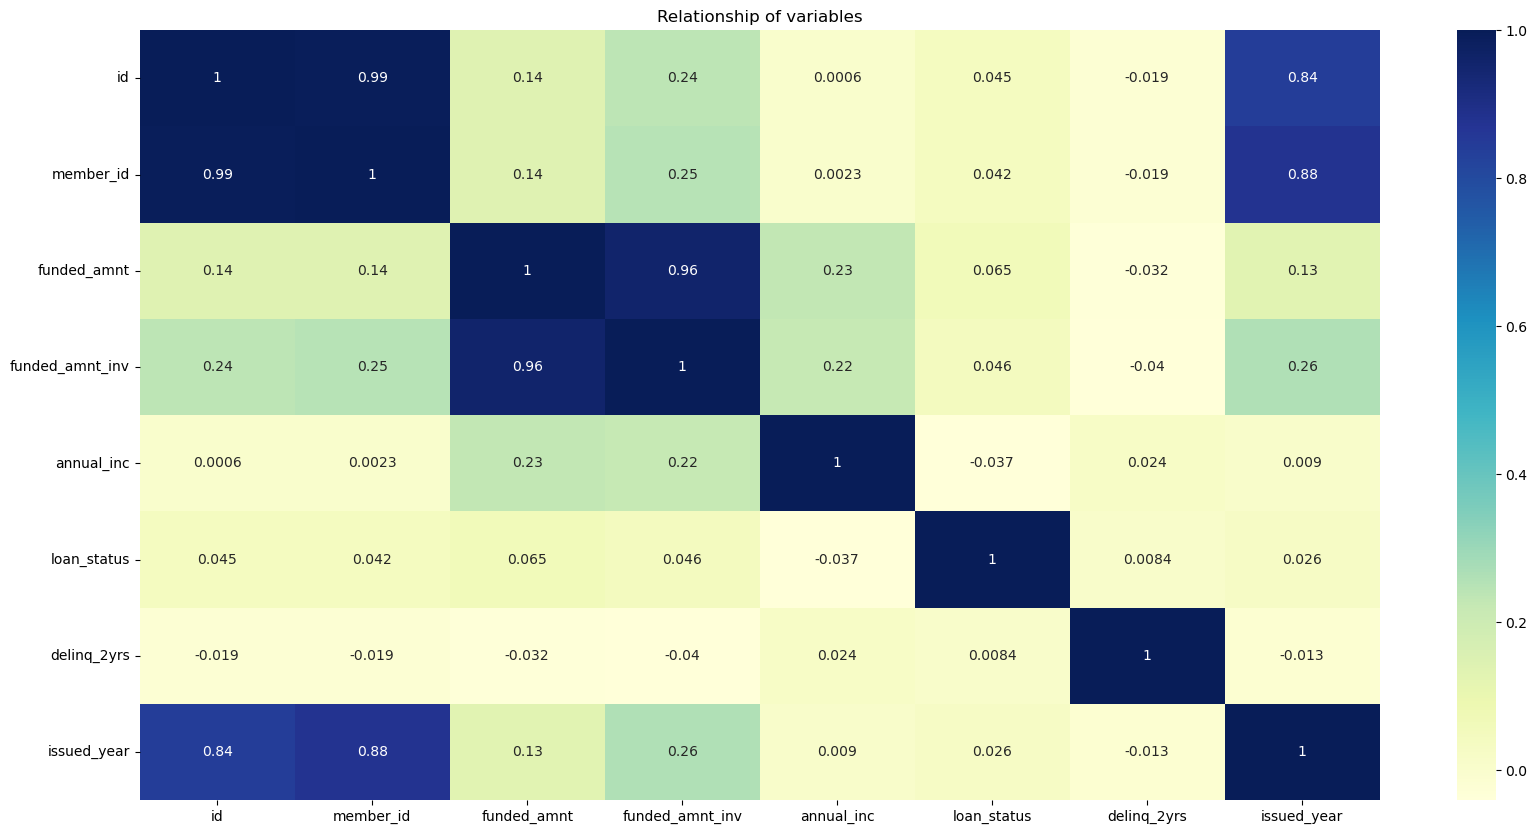

In [94]:
# Correlation of variables

plt.figure(figsize=[20,10])
sns.heatmap(loan.corr(),cmap ='YlGnBu',annot=True)
plt.title('Relationship of variables')
plt.show()


#### From the above heatmap, the variables
* funded_amnt and funded_amnt_inv  are highly correlated.


### 1. funded_amnt and funded_amnt_inv

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt', ylabel='funded_amnt_inv'>

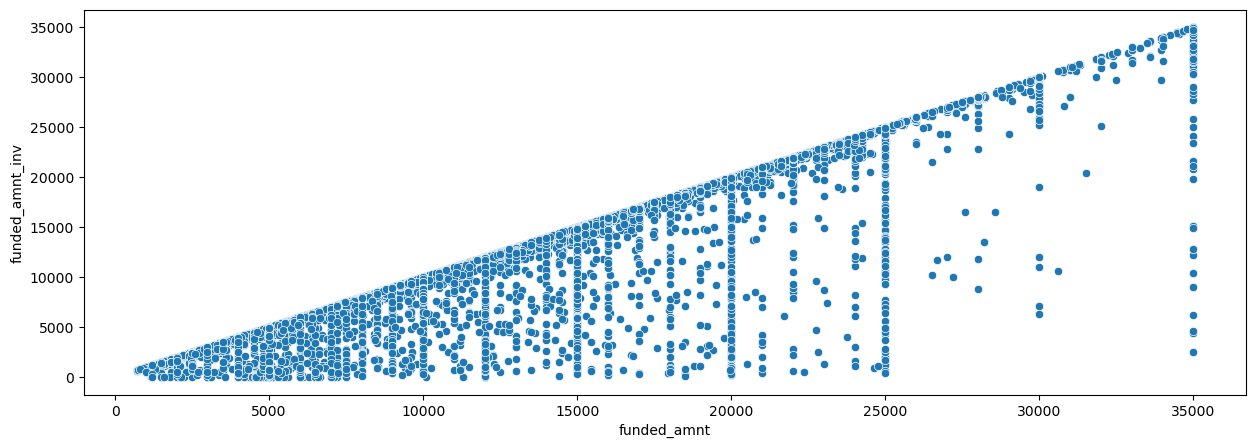

In [95]:
plt.figure(figsize=[15,5])
sns.scatterplot(loan.funded_amnt,loan['funded_amnt_inv'])

#### 2. Rate of default vs Verification Status vs Grade

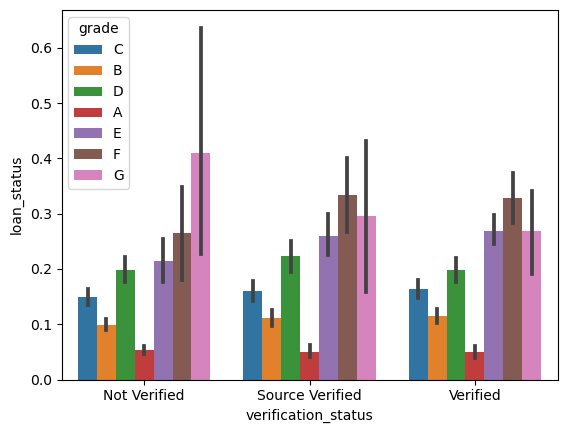

In [96]:
sns.barplot(x= 'verification_status', y='loan_status', hue='grade', data=loan)
plt.show()

### The loans of Grade G have higher percentage of getting defaulted.

#### 3. Rate of Default vs Term vs Grade

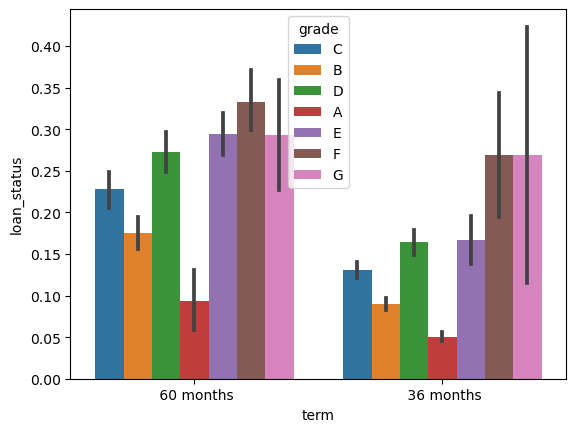

In [97]:
sns.barplot(x= 'term', y='loan_status', hue='grade', data=loan)
plt.show()

#### The loans of Grade G in term 36 months have higher percentage of defaults as compared to 60 months.

#### 4. dti vs Grade vs loan_status

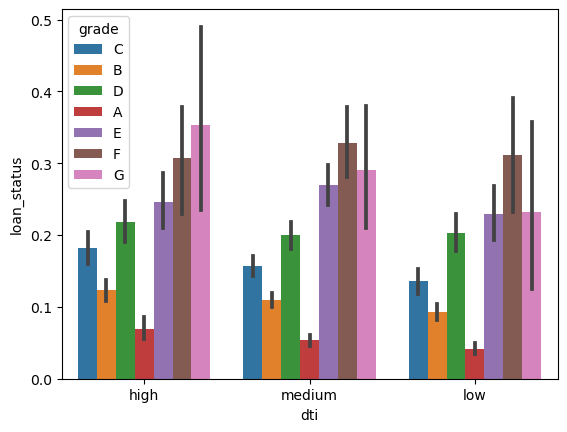

In [98]:
sns.barplot(x= 'dti', y='loan_status', hue='grade', data=loan)
plt.show()